In [2]:
import os, shutil

original_dataset_dir = 'F:/data/dogs-vs-cats/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir = 'F:/data/dogs-vs-cats_small'

if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir) # 존재한다면 지운다.

os.mkdir(base_dir) # make directory의 약어

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train') # os.path.join : 인수에 전달된 2개의 문자열을 결합하여, 1개의 경로로 할 수 있다.
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') # 훈련용 고양이 사진 디렉터리
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') # 훈련용 강아지 사진 디렉터리
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # 검증용 고양이 사진 디렉터리
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 검증용 강아지 사진 디렉터리
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # 테스트용 고양이 사진 디렉터리
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') # 테스트용 강아지 사진 디렉터리
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) # copy data from src to dst

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) # copy data from src to dst

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir))) 
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir))) 
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir))) 

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 모든 이미지를 1/255로 스케일을 조정한다.
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # 모든 이미지를 150x150 크기로 바꾼다.
    batch_size=20,
    class_mode='binary' # binary_crossentropy 손실을 사용하기 때문에 이진 테이블이 필요
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# 실행결과
# Found 2000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

# 배치 데이터 크기: (20, 150, 150, 3)
# 배치 레이블 크기: (20,)

(20, 150, 150, 3)
(20,)


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
    )

Epoch 1/30


C:\Users\poeun\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 47s 459ms/step - loss: 0.6905 - accuracy: 0.5255 - val_loss: 0.6710 - val_accuracy: 0.6180
Epoch 2/30
100/100 [==============================] - 37s 372ms/step - loss: 0.6514 - accuracy: 0.6200 - val_loss: 0.6280 - val_accuracy: 0.6450
Epoch 3/30
100/100 [==============================] - 36s 356ms/step - loss: 0.5993 - accuracy: 0.6845 - val_loss: 0.6189 - val_accuracy: 0.6440
Epoch 4/30
100/100 [==============================] - 36s 360ms/step - loss: 0.5578 - accuracy: 0.7165 - val_loss: 0.5985 - val_accuracy: 0.6570
Epoch 5/30
100/100 [==============================] - 35s 354ms/step - loss: 0.5346 - accuracy: 0.7335 - val_loss: 0.6304 - val_accuracy: 0.6560
Epoch 6/30
100/100 [==============================] - 37s 372ms/step - loss: 0.5094 - accuracy: 0.7455 - val_loss: 0.5777 - val_accuracy: 0.6860
Epoch 7/30
100/100 [==============================] - 38s 381ms/step - loss: 0.4791 - accuracy: 0.7580 - val_loss: 0.5833 - val_accuracy: 0.6

In [10]:
model.save('f:/data/dogs-vs-cats/cats_and_dogs_small_1.h5')

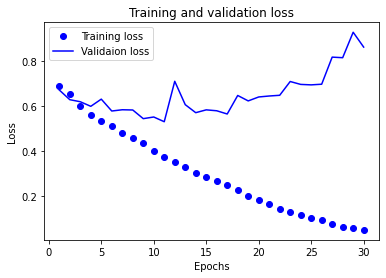

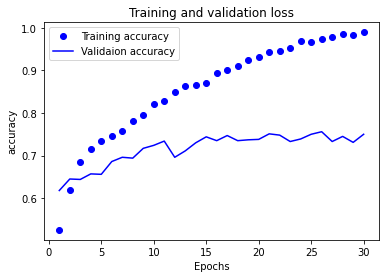

In [11]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validaion accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()